In [1]:
%matplotlib inline

In [2]:
# coding: utf-8
from __future__ import print_function,division,absolute_import

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from pymesh.obj import OBJ  # pymesh not by qnzhou's, but by adamlwgriffiths' (ported to python3 by myself), https://github.com/adamlwgriffiths/PyMesh

**NOTE**

install ipywidgets for interactive plots. ipyvolume >= 4.0 required for plot_trisurf

```
run conda create -n lathe36 python=3.6.1
run conda install -y -n lathe36 jupyter
run conda install -y -n lathe36 -c conda-forge ipyvolume=0.4 ipywidgets=7.2 widgetsnbextension=3.2
run conda install -y -n lathe36 -c conda-forge tetgen
```

In [5]:
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0.0,1.0,4))[:,:3]
colors = [[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0],[0.0,0.0,0.0]]

import ipyvolume.pylab as p3
# p3.figure()
# p3.plot_trisurf([0,0,3.,3.],[0,4.,0,4.],2.,triangles=[[0,2,3],[0,3,1]],color=colors)
# p3.squarelim()
# p3.show()

- https://docs.scipy.org/doc/scipy-0.15.1/reference/spatial.html 
- https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.Voronoi.html#qhull

### Object `Voronoi`

#### Attributes:

- **points** : ndarray of double, shape (npoints, ndim)
    - Coordinates of input _points_.
- **vertices** : ndarray of double, shape (nvertices, ndim)
    - Coordinates of the Voronoi _vertices_.
- **ridge_points** : ndarray of ints, shape (nridges, 2)
    - Indices of the _points_ between which each Voronoi _ridge_ lies.
- **ridge_vertices** : list of list of ints, shape (nridges, *)
    - Indices of the Voronoi _vertices_ forming each Voronoi _ridge_.
- **regions** : list of list of ints, shape (nregions, *)
    - Indices of the Voronoi _vertices_ forming each Voronoi _region_. -1 indicates vertex outside the Voronoi diagram.
- **point_region** : list of ints, shape (npoints)
    - Index of the Voronoi _region_ for each input _point_. If qhull option “Qc” was not specified, the list will contain -1 for points that are not associated with a Voronoi region.

#### Undocumented Attributes:

- **ridge_dict** : dictionary, **ridge_points** |=> **ridge_vertices**
- **ndim** : points ndim
- **npoints** : points num_points
- **min_bound** : min bound, `np.amin(points,axis=0)`
- **max_bound** : max bound, `np.amax(points,axis=0)`


In [6]:
# from pattern import create_pattern, plot_pattern

In [7]:
# num_groups = 11
# voronoi, lineseg_dict, c_point_linesegs = create_pattern(num_groups)

In [8]:
# from ipywidgets import interact,IntSlider

# @interact(point_number=IntSlider(min=0,max=num_groups-1,value=0,continuous_update=False))
# def show_voronoi_cell(point_number):
#     plt.figure(figsize=[11.5,4.5])
#     ax = plt.subplot(121)
#     plot_pattern(voronoi, lineseg_dict, c_point_linesegs, selections=[point_number],ax=ax)
#     ax = plt.subplot(122)
#     plot_pattern(voronoi, lineseg_dict, c_point_linesegs,ax=ax)


In [9]:
from simple_svg import normalize_svg

In [10]:
# use_map_xz = False
# svg_path = '''
# m 391.70976,851.54669 c 34.27007,-0.008 71.71313,-7.19875
# 101.93595,13.63887 22.69871,19.92007 58.04281,3.73196 49.27057,-27.83489
# -7.42351,-33.89336 -17.8381,-75.4953 -20.76928,-110.26026
# -8.10378,-67.27212 -11.74769,-115.35715 14.31191,-161.2026
# 26.0596,-45.84545 48.11138,-88.67184 59.80266,-124.06768
# 11.69128,-35.39584 20.08866,-65.99212 24.70468,-99.91615 0.34219,-36.23155
# -34.34188,-58.10628 -59.77117,-77.93939 -22.23515,-12.80355
# -25.84577,-39.51341 -36.09895,-59.87042 -34.55894,-10.05167
# -21.60299,42.42532 -2.74272,53.66117 23.91321,25.40224 58.26754,45.0354
# 65.532,82.13536 10.3486,46.08391 -14.84571,89.48711 -32.21182,130.63696
# -23.19916,50.76089 -54.16657,101.67171 -66.76628,153.50172
# -12.59971,51.83001 7.05534,94.55435 12.2199,141.5473 2.08716,19.53932
# 12.55321,30.24752 10.81054,57.76824 -1.74267,27.52072 -35.49165,10.32954
# -57.11444,7.47291 -21.62279,-2.85663 -42.9164,-1.12153 -64.02263,-1.03146
# '''
# simplified_svg_path = normalize_svg(svg_path)
# simplified_svg_path


In [11]:
# use_map_xz = False
# svg_path = '''
# m 32,872.3622 c 85.00366,0.46231 163.65989,-1.46892 217.51345,4.00054
# 53.85355,5.46946 72.88238,28.16978 74.36234,35.99567 15.6648,-1.77952
# 34.72603,-2.20097 56.73497,-0.16865 8.69378,-73.59952 3.53928,-153.31612
# 25.38924,-222.82756 21.84996,-69.51144 75.92261,-101.73139 98,-156
# 24.18459,-57.33333 24.27435,-115.93005 11,-172 -9.05665,-33.06504
# -25.67515,-61.33816 -52,-84 -26.32485,-22.66184 -41.87658,-32.57509
# -58,-40 -16.12342,-7.42491 -13.75092,-16.70175 0,-30 13.75092,-13.29825
# 49.60538,-32.45763 30,-46 -19.60538,-13.54237 -33.27204,-3.77275
# -57,10 -23.72796,13.77275 -63.62532,33.33373 -58,50 8.47183,34.14528
# 58.37288,47.54028 82,71 23.62712,23.45972 33.49236,43.40268 47,78
# 12.70482,54.66667 8.19076,106.99679 -14,164 -22.15739,49.96502
# -47.83344,101.58856 -75,148 -27.16656,46.41144 16.39025,159.58211
# -35.37051,170.56587 -47.32823,5.02241 -93.26638,-6.12352
# -138.62949,-5.56587 -45.36311,0.55765 -85.5124,-1.33296 -153.442715,7.2e-4
# '''
# simplified_svg_path = normalize_svg(svg_path)
# simplified_svg_path


In [12]:
use_map_xz = True
svg_path = '''
m 72.9375,723.4247 c 34.16543,-0.28679 68.96657,-2.44188 102.5976,4.43271
13.76815,3.12321 14.41144,10.92511 16.30184,27.56522 7.24807,-0.24516
14.72789,-0.36454 21.83033,-0.27069 2.22108,-18.5269 6.77972,-23.2246
36.39811,-41.68574 31.99081,-19.3637 61.90677,-24.75747 92.32702,-38.87459
30.42025,-14.11712 47.28302,-20.99969 80.43205,-42.84689 33.14903,-21.8472
81.74098,-55.86091 105.73097,-79.43994 23.98999,-23.57903
23.41466,-47.65451 18.27888,-51.48078 -5.13578,-3.82627 -23.95785,11.30215
-49.21251,36.7587 -25.25466,25.45655 -35.06842,31.98461 -62.76063,54.57486
-27.69221,22.59025 -53.65612,38.66052 -101.85371,56.08804
-48.19759,17.42752 -123.73552,39.16954 -170.67772,40.91027
-46.9422,1.74073 -60.93221,2.68137 -90.32973,1.20633
'''
simplified_svg_path = normalize_svg(svg_path)
simplified_svg_path


'm72,723c34,0,68,-2,102,4c13,3,14,10,16,27c7,0,14,0,21,0c2,-18,6,-23,36,-41c31,-19,61,-24,92,-38c30,-14,47,-20,80,-42c33,-21,81,-55,105,-79c23,-23,23,-47,18,-51c-5,-3,-23,11,-49,36c-25,25,-35,31,-62,54c-27,22,-53,38,-101,56c-48,17,-123,39,-170,40c-46,1,-60,2,-90,1'

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [14]:
user_seed = 3#802087
num_groups = 11

In [15]:
np.random.seed(user_seed)
cells = np.random.uniform([0.0,0.0],[1.0,1.0],size=[num_groups,2])

if use_map_xz:
    voronoi = Voronoi(cells)
    voronoi_points = voronoi.points[:]
    voronoi_group = np.arange(len(voronoi_points))
else:
    cells_mirrored = np.concatenate([cells,cells + [-1.0, 0.0],cells + [1.0, 0.0],],axis=0)
    voronoi = Voronoi(cells_mirrored)
    voronoi_points = voronoi.points[:]
    voronoi_group = np.arange(len(voronoi_points))
    voronoi_group[num_groups:num_groups*2] -= num_groups
    voronoi_group[num_groups*2:] -= num_groups * 2

In [16]:
!mkdir -p outputs

/data2/AIRI/lathe-and-shatter/pattern.py:89: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/keeyoung/miniconda2/envs/lathe36/lib/python3.6/site-packa

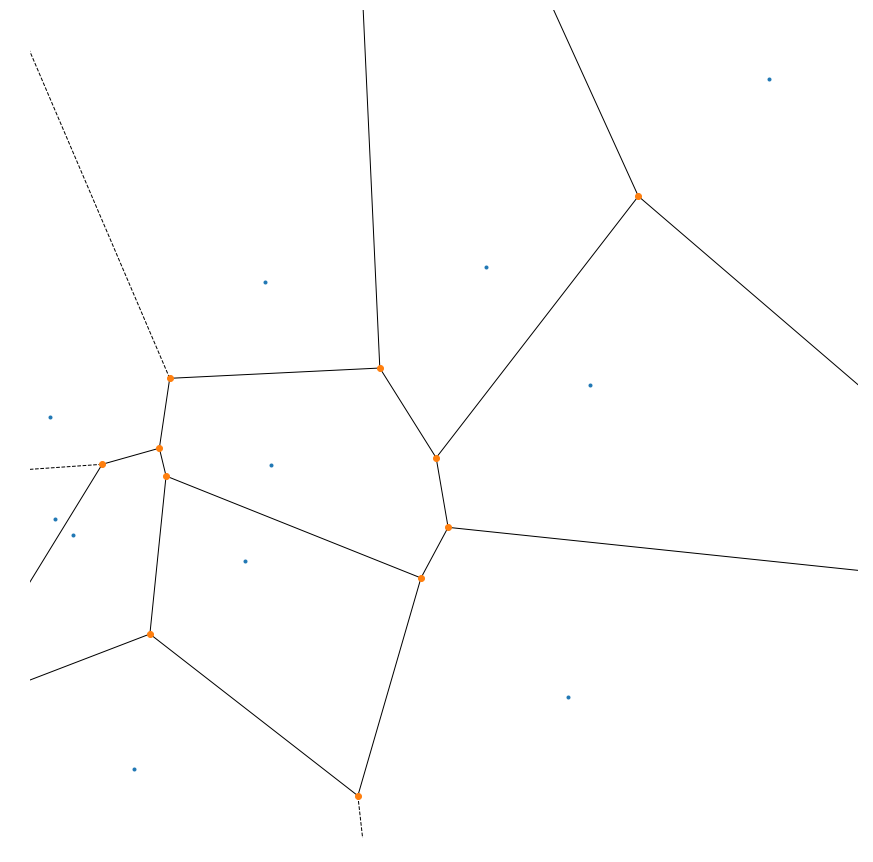

In [17]:
from pattern import save_pattern_png, save_pattern_json
save_pattern_json(voronoi, 'outputs/voronoi_shatter.json')
save_pattern_png(voronoi, 'outputs/voronoi.png')

In [18]:
filename = 'outputs/voronoi_shatter.json'

In [19]:
import json

voronoi_shatter = { 
    'num_groups': num_groups,
    'point_group': voronoi_group.tolist(),
    'point': voronoi.points.tolist(),
}   
with open(filename,'w') as f:
    json.dump(voronoi_shatter,f)

In [52]:
obj = OBJ()
obj.load('/data2/DATA/Pottery/18-0702-02/18-0702-02/18-0702-02.obj')
#obj.load('/data2/DATA/Pottery/18-0702-03/18-0702-03/18-0702-03.obj')
#obj.load('/data2/DATA/Pottery/18-0702-07/18-0702-07/18-0702-07.obj')
#obj.load('/data2/DATA/Pottery/18-0702-08/18-0702-08/18-0702-08.obj')
#obj.load('/data2/DATA/Pottery/18-0702-09/18-0702-09/18-0702-09.obj')

In [53]:
np.array(obj.model.meshes[0]['faces']).shape
#obj.model.meshes

(184086, 3, 3)

In [54]:
np.array(obj.model.vertices).shape

(92090, 3)

In [55]:
np.array(obj.model.texture_coords).shape

(552258, 2)

In [56]:
np.array(obj.model.normals).shape

(92090, 3)

In [57]:
# vertices_to_texcoords = dict()

# for face in obj.model.meshes[0]['faces']:
#     #x,y,z = face   # each x,y,z has (vertices index, texture coordinates index, normals index)
#     for xyz in face:
#         if not xyz[0] in vertices_to_texcoords.keys():
#             vertices_to_texcoords[xyz[0]] = [xyz[1]]
#         elif vertices_to_texcoords[xyz[0]] == [xyz[1]]:
#             pass # No Problem
#         else:
#             print(xyz[1], "encountered", vertices_to_texcoords[xyz[0]], "at", xyz[0])
#             vertices_to_texcoords[xyz[0]] = [xyz[1]]
            
#     # vertice positions in x,y,z ()
    
    
#     # texture coordinations (u,v)
    
    
#     # face

# #positions = np.array(obj.model.vertices)[np.array(set(vertices_used))]

In [58]:
assert len(set(list(np.array(obj.model.meshes[0]['faces'])[:,:,0].flatten()))) == np.array(obj.model.vertices).shape[0]

Let's find axis of symmetry, 
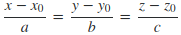

In [59]:
X = np.array(obj.model.vertices)
X = X - np.mean(X, axis=0)   # X_centered

n_samples = X.shape[0]
print(n_samples)

from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 3
X_reduced = pca.fit_transform(X)
print("X_reduced")
print(X_reduced.shape)
x,y,z = X_reduced.transpose()
p3.figure()
p3.scatter(x, y, z, size=0.1, marker='sphere')
p3.squarelim()
p3.show()

# We center the data and compute the sample covariance matrix.
# https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
#cov_matrix = np.dot(X.T, X) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    #print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)
    print(eigenvector)

92090
X_reduced
(92090, 3)


1699.7106235710992
[-0.35466332  0.82611805  0.43788456]
1089.458301043673
[0.93099297 0.26874342 0.24704061]
285.6237313970617
[ 0.08640611  0.49528369 -0.86442353]


In [60]:
x, y, z = X.transpose()
# x0, y0, z0 = np.mean(X, axis=0)  # weight center
# #x, y, z = np.array(obj.model.vertices).transpose()
# #x0, y0, z0 = np.mean(np.array(obj.model.vertices), axis=0)  # weight center
# x0 = np.array([x0])
# y0 = np.array([y0])
# z0 = np.array([z0])
# #print(x0, y0 ,z0)

import ipyvolume.pylab as p3
import numpy as np

#p3.figure()
#p3.scatter(x0, y0, z0, color='blue', size=0.4, marker='box')
#u, v, w = [0.72530695, 0.47285305, 0.5003397]
#u, v, w = [0.68162702, -0.39137615, -0.61823079]
#u, v, w = [-0.09651128, 0.78945215, -0.60617726]  # axis of symmetry
#u, v, w = [-0.43730349, -0.77042362, 0.46391066]  # axis of symmetry
#u, v, w = [-0.05792071, 0.85001623, -0.52356242]  # axis of symmetry
#u, v, w = [0.13148294, -0.12025022, 0.98399803]  # axis of symmetry
_u, _v, _w = eigenvector  # the third (pca.n_components-th) eigenvector
# p3.quiver(x0, y0, z0, u, v, w, color='blue', size=1, marker='arrow')
# p3.scatter(x, y, z, size=0.1, marker='sphere')
# p3.squarelim()
# p3.show()

In [61]:
# find axis using the closest point from the center (0,0,0) of the X_centered.
closest_point_idx = np.sum(X*X,axis=1).argmin()
_u, _v, _w = -X[closest_point_idx]
print(_u, _v, _w)
_u, _v, _w = (_u, _v, _w) / np.sqrt(_u**2 + _v**2 + _w**2)
print(_u, _v, _w)

p3.figure()
#p3.scatter(x0, y0, z0, color='blue', size=0.4, marker='box')
#p3.quiver(x0, y0, z0, _u, _v, _w, color='blue', size=1, marker='arrow')
p3.quiver(np.array([0]), np.array([0]), np.array([0]), _u, _v, _w, color='blue', size=10, marker='arrow')
p3.scatter(x, y, z, size=0.1, marker='sphere')
p3.squarelim()
p3.show()

1.1161305627332325 6.141682897033519 -3.745677000757496
0.15331794659821815 0.8436559681016771 -0.5145271758977635


In [64]:
# calc rotation matrix R that rotates unit vector (u,v,w) to (0,1,0)
# https://math.stackexchange.com/questions/180418/calculate-rotation-matrix-to-align-vector-a-to-vector-b-in-3d
_cp = np.cross((_u,_v,_w), (0,1,0))
_sine_2 = _cp[0]**2 + _cp[1]**2 + _cp[2]**2
_cos = np.dot((_u,_v,_w), (0,1,0))
_Vx = np.array([[0,-_cp[2], _cp[1]],[_cp[2],0,-_cp[0]],[-_cp[1],_cp[0],0]])
R = np.array([[1,0,0],[0,1,0],[0,0,1]]) + _Vx + np.dot(_Vx,_Vx) * (1-_cos) / _sine_2

# rotation!!
rotated_X = np.array([np.dot(R, d) for d in X])

In [65]:
x, y, z = rotated_X.transpose()
y = -y  # upside down

import ipyvolume.pylab as p3
import numpy as np

p3.figure()
p3.quiver(np.array([0]), np.array([0]), np.array([0]), np.array([0]), np.array([1]), np.array([0]), color='blue', size=10, marker='arrow')  # quiver bugs?
p3.scatter(x, -y, z, size=0.1, marker='sphere')
p3.squarelim()
p3.show()

In [66]:
y_min = np.amin(y)
y_max = np.amax(y)
#print(y_min, y_max)
z_min = np.amin(z)
z_max = np.amax(z)

if use_map_xz:
    #u, v = x, z
    us = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
    vs = (z - np.amin(z)) / (np.amax(z) - np.amin(z))
else:
    # calc angle between two vectors (0~360 degree), (x,z) == (1,0) is 0 degree
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html
    us = np.arctan2(z,x) * 180 / np.pi
    us[us<0] = 360 + us[us<0]
    us /= 360
    #vs = (y - y_min) / (y_max - y_min)
    vs = (z - z_min) / (z_max - z_min)
np.amin(us), np.amax(us), np.amin(vs), np.amax(vs)

(0.0, 1.0, 0.0, 1.0)

In [67]:
position = np.c_[x, y, z]
texcoord = np.c_[us,vs]
indices = np.array(obj.model.meshes[0]['faces'])[:,:,0]
position.shape, texcoord.shape, indices.shape

((92090, 3), (92090, 2), (184086, 3))

In [68]:
# from bezier_to_lineseg import bezier_to_lineseg
# from lathe_path import lathe_path

# points = bezier_to_lineseg(curve_points, tolerance=0.02, simplify_eps=0.001)
# position, texcoord, indices = lathe_path(points, 
#                                          num_divisions=360, 
#                                          cap_start=False,
#                                          cap_end=False,
#                                          use_map_xz=use_map_xz)
# # position = coord of each points in x,y,z space
# # texcoord = coord of each points in u,v space
# # indices = indices of 3 points for triangles mesh

In [69]:
x, y, z = position.transpose()
u, v = texcoord.transpose()

triangles = indices[:]
xs, ys, zs = position[triangles].transpose()

import ipyvolume.pylab as p3
import numpy as np

# p3.figure()
# p3.plot_trisurf(x, -y, z, triangles=triangles, u=u, v=v)
# p3.squarelim()
# p3.show()

In [70]:
from PIL import Image
t_voronoi = Image.open('outputs/voronoi.png') # texture from voronoi map
texture = t_voronoi

import ipyvolume.pylab as p3
import numpy as np

p3.figure()
p3.plot_trisurf(x, y, z, triangles=triangles, u=u, v=v, texture=texture)
p3.squarelim()
p3.show()

(92090,) (92090,) (92090,)
(883,) (883,) (883,)


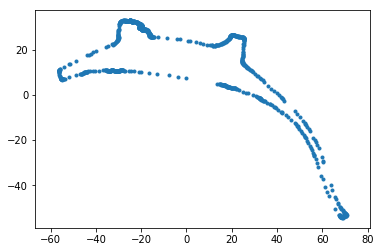

In [81]:
def plot_slice(x, y, z, slice_angle=0):
    print(x.shape, y.shape, z.shape)
    
    if not slice_angle == 0:
        # rotate with the given angle
        _rad = np.deg2rad(slice_angle)
        R = np.array([[np.cos(_rad),0,np.sin(_rad)],[0,1,0],[-np.sin(_rad),0,np.cos(_rad)]])
        # rotation!!
        _rotated = np.array([np.dot(R, d) for d in np.c_[x,y,z]])
        x, y, z = _rotated.transpose()
        
    x = x[z<0.5]
    y = y[z<0.5]
    z = z[z<0.5]
    x = x[z>-0.5]
    y = y[z>-0.5]
    z = z[z>-0.5]
    
    print(x.shape, y.shape, z.shape)
#     p3.figure()
#     p3.scatter(x, y, z, marker='sphere', size=0.2)
#     p3.squarelim()
#     p3.show()
    import pylab as p2
    p2.scatter(x,y, marker='.')
    p2.axis('equal')
    p2.show()
    
plot_slice(x,y,z, slice_angle=45)

In [82]:
# from pattern import load_pattern_json
# num_groups, voronoi_points, voronoi_group = load_pattern_json('outputs/voronoi_shatter.json')

In [83]:
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0.0,1.0,num_groups))[:,:3]

In [84]:
from pattern import find_voronoi_group
vert_group = find_voronoi_group(texcoord,voronoi_points,voronoi_group)
vert_color = colors[vert_group]

In [85]:
import ipyvolume.pylab as p3
import numpy as np

p3.figure()
p3.plot_trisurf(x, y, z, triangles=triangles, color=vert_color)
p3.squarelim()
p3.show()

# # random perturbation
# _min = np.amin(y)
# _max = np.amax(y)

# _range = _max - _min
# pertub_max = _range * 0.005  # rand_perturbation

# np.random.seed(123678)
# rand_array = (np.random.rand(y.shape[0]) - 0.499999999) * 1.999999999 * pertub_max

# print(np.amin(rand_array), np.amax(rand_array))

# y_p = y + rand_array

# p3.figure()
# p3.plot_trisurf(x, y_p, z, triangles=triangles, color=vert_color)
# p3.squarelim()
# p3.show()

# generate .smesh file

tetgen document: http://wias-berlin.de/software/tetgen/1.5/doc/manual/manual.pdf

.node file format: http://wias-berlin.de/software/tetgen/1.5/doc/manual/manual006.html


In [86]:
vert_group = -(2 + find_voronoi_group(texcoord,voronoi_points,voronoi_group))
face_group = -(2 + find_voronoi_group(np.min(texcoord[triangles],axis=1),voronoi_points,voronoi_group))

In [43]:
from lathe_path import save_mesh

with open('outputs/generated_lathe.smesh','w') as f:
    save_mesh(f,position,indices,
              node_attrs=texcoord,
              node_boundary_markers=vert_group,
              face_boundary_markers=face_group)